### Python Implementation



*   **Ridge and Lasso regression. http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html**
 
* **Prepare a data set from the credit scores data set you used in the previous homework, for this regression implementation.** 
 
* **Using Python, implement Ridge and Lasso regression following the tutorial. Explain the results.**

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('creditset.csv')

In [3]:
df.head()

,clientid,income,age,loan,LTI,default10yr
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1


In [4]:
X = df.drop('default10yr', axis=1)
y = df['default10yr']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import*
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

**Linear Regression**

In [7]:
lr = LinearRegression()

lr.fit(X_train, y_train)
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)

In [8]:
print("LR Train Score: {:0.2f}\nLR Test Score: {:0.2f}".format(lr_train_score, lr_test_score))

LR Train Score: 0.38
LR Test Score: 0.44


**Ridge**

In [9]:
# setting tuning parameter to 0.01 -> reduced effect of penalty term
ridge001 = Ridge(alpha = 0.01)

# setting tuning parameter to 100 -> amplified effect of penalty term
ridge100 = Ridge(alpha = 100)

In [10]:
ridge001.fit(X_train, y_train)
r001_train_score = ridge001.score(X_train, y_train)
r001_test_score = ridge001.score(X_test, y_test)

ridge100.fit(X_train, y_train)
r100_train_score = ridge100.score(X_train, y_train)
r100_test_score = ridge100.score(X_test, y_test)

In [11]:
print("RR001 Train Score: {:0.2f}\nRR001 Test Score: {:0.2f}".format(r001_train_score, r001_test_score))
print("\nRR100 Train Score: {:0.2f}\nRR100 Test Score: {:0.2f}".format(r100_train_score, r100_test_score))

RR001 Train Score: 0.38
RR001 Test Score: 0.44

RR100 Train Score: 0.37
RR100 Test Score: 0.43


**Lasso**

In [12]:
# setting tuning parameter to 0.01 -> reduced effect of penalty term
lasso001 = Lasso(alpha=0.01, max_iter=10e5)

# setting tuning parameter to 0.0001 -> further reduced effect of penalty term
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)

In [13]:
lasso001.fit(X_train, y_train)
l001_train_score = lasso001.score(X_train, y_train)
l001_test_score = lasso001.score(X_test, y_test)

lasso00001.fit(X_train, y_train)
l00001_train_score = lasso00001.score(X_train, y_train)
l00001_test_score = lasso00001.score(X_test, y_test)


In [14]:
print("Lasso001 Train Score: {:0.2f}\nLasso001 Test Score: {:0.2f}".format(l001_train_score, l001_test_score))
print("\nLasso00001 Train Score: {:0.2f}\nLasso00001 Test Score: {:0.2f}".format(l00001_train_score, l00001_test_score))
print("\nTotal # of Features: {}\nLasso selected # of features: {}".format(X_train.shape[1], np.sum(lasso001.coef_!=0)))

Lasso001 Train Score: 0.37
Lasso001 Test Score: 0.43

Lasso00001 Train Score: 0.38
Lasso00001 Test Score: 0.44

Total # of Features: 5
Lasso selected # of features: 4


*_LR, Ridge, Lasso Test Score Observation_*

* All three methods scored around the same in terms of both training and testing prediction accuracies

**Comparisons of coefficients**

Text(0.5,1,'LR & Lasso Coefficients')

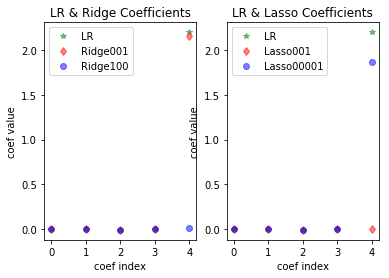

In [15]:
plt.subplot(1, 2, 1)

plt.plot(lr.coef_, label = 'LR', linestyle='none', marker='*', color = 'g', alpha=0.5)
plt.plot(ridge001.coef_, label = 'Ridge001', linestyle='none', marker='d', color = 'r', alpha=0.5)
plt.plot(ridge100.coef_, label = 'Ridge100', linestyle='none', marker='o', color = 'b', alpha=0.5)

plt.xlabel('coef index')
plt.ylabel('coef value')
plt.legend(loc=2)
plt.title('LR & Ridge Coefficients')

plt.subplot(1, 2, 2)

plt.plot(lr.coef_, label = 'LR', linestyle='none', marker='*', color = 'g', alpha=0.5)
plt.plot(lasso001.coef_, label = 'Lasso001', linestyle='none', marker='d', color = 'r', alpha=0.5)
plt.plot(lasso00001.coef_, label = 'Lasso00001', linestyle='none', marker='o', color = 'b', alpha=0.5)

plt.xlabel('coef index')
plt.ylabel('coef value')
plt.legend(loc=2)
plt.title('LR & Lasso Coefficients')

*_Observation_*

* In LR vs. Ridge coefficients, by setting the tuning parameter to 0.01, the coefficients do not appear to be signficantly reduced or minimized compared to that of a regular LR.  Whereas by increasing the parameter to 100, the coefficient of the last feature is suppressed to near 0 if not exactly 0.


* In LR vs. Lasso coefficients, by setting the tuning parameter to 0.01, the coefficient of the last features almost becomes 0 if not exactly; in comparision, Lasso method seems to have a greater effect on regularizing flexibility of a model.
